In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('adult.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns = ['age','workclass','fnlwgt','education','ed_num','marital_status','occupation','relation',
              'race','sex','cap_gain','cap_loss','hrs_per_week','country','Salary']

In [5]:
df.head()

,age,workclass,fnlwgt,education,ed_num,marital_status,occupation,relation,race,sex,cap_gain,cap_loss,hrs_per_week,country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
ed_num            0
marital_status    0
occupation        0
relation          0
race              0
sex               0
cap_gain          0
cap_loss          0
hrs_per_week      0
country           0
Salary            0
dtype: int64

In [8]:
num_feat = df.select_dtypes(exclude='O')

In [9]:
num_feat

,age,fnlwgt,ed_num,cap_gain,cap_loss,hrs_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


<AxesSubplot:xlabel='age'>

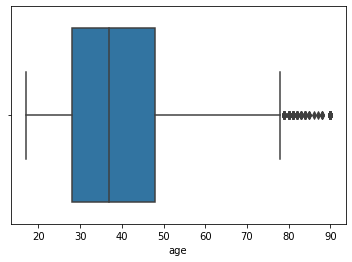

In [10]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

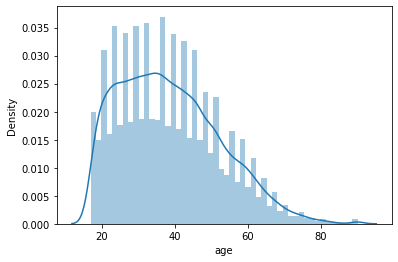

In [11]:
sns.distplot(df['age'])

In [12]:
num_feat.columns

Index(['age', 'fnlwgt', 'ed_num', 'cap_gain', 'cap_loss', 'hrs_per_week'], dtype='object')

In [13]:
quant_25 = df['age'].quantile(0.25)
quant_75 = df['age'].quantile(0.75)
IQR = quant_75 - quant_25
lower_limit = quant_25 - 1.5 * IQR
upper_limit = quant_75 + 1.5 * IQR

df['age'] = np.where(df['age'] < lower_limit, lower_limit, np.where(df['age'] > upper_limit, upper_limit, df['age']))

<AxesSubplot:xlabel='age'>

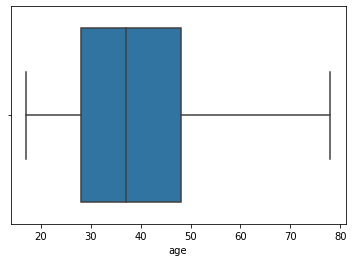

In [14]:
sns.boxplot(df['age'])

In [15]:
quant_25 = df['fnlwgt'].quantile(0.25)
quant_75 = df['fnlwgt'].quantile(0.75)
IQR = quant_75 - quant_25
lower_limit = quant_25 - 1.5 * IQR
upper_limit = quant_75 + 1.5 * IQR

df['fnlwgt'] = np.where(df['fnlwgt'] < lower_limit, lower_limit, np.where(df['fnlwgt'] > upper_limit, upper_limit, df['fnlwgt']))

In [16]:
quant_25 = df['ed_num'].quantile(0.25)
quant_75 = df['ed_num'].quantile(0.75)
IQR = quant_75 - quant_25
lower_limit = quant_25 - 1.5 * IQR
upper_limit = quant_75 + 1.5 * IQR

df['ed_num'] = np.where(df['ed_num'] < lower_limit, lower_limit, 
                        np.where(df['ed_num'] > upper_limit, upper_limit, df['ed_num']))

In [17]:
quant_25 = df['hrs_per_week'].quantile(0.25)
quant_75 = df['hrs_per_week'].quantile(0.75)
IQR = quant_75 - quant_25
lower_limit = quant_25 - 1.5 * IQR
upper_limit = quant_75 + 1.5 * IQR

df['hrs_per_week'] = np.where(df['hrs_per_week'] < lower_limit, lower_limit, 
                        np.where(df['hrs_per_week'] > upper_limit, upper_limit, df['hrs_per_week']))

<AxesSubplot:xlabel='hrs_per_week'>

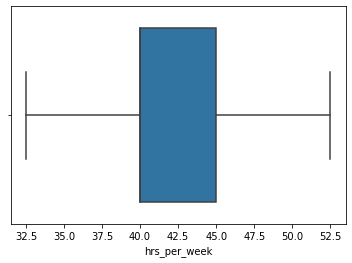

In [18]:
sns.boxplot(df['hrs_per_week'])

In [19]:
cat_feat = df.select_dtypes(include='O')

In [20]:
cat_feat

,workclass,education,marital_status,occupation,relation,race,sex,country,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [21]:
for x in cat_feat.columns:
    print(x,': ', df[x].unique(),'\n')

workclass :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital_status :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation :  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relation :  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race :  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex :  [' Male' ' Female'] 

country :  [' United-States' ' 

In [55]:
def feature_engineering(df):
    df.columns = ['age','workclass','fnlwgt','education','ed_num','marital_status','occupation','relation',
              'race','sex','cap_gain','cap_loss','hrs_per_week','country','Salary']
    
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
    wrkcls_label = {value:key for key,value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(wrkcls_label)
    
    edn_label = {value:key for key,value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(edn_label)
    
    mrg_label = {value:key for key,value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(mrg_label)

    df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
    occp_label = {value:key for key,value in enumerate(df['occupation'].unique())}
    df['occupation'] = df['occupation'].map(occp_label)
    
    rel_label = {value:key for key,value in enumerate(df['relation'].unique())}
    df['relation'] = df['relation'].map(rel_label)
    
    race_label = {value:key for key,value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(race_label)
    
    df['country'] = np.where(df['country'] == ' ?', 'Missing', df['country'])
    cntry_label = {value:key for key,value in enumerate(df['country'].unique())}
    df['country'] = df['country'].map(cntry_label)
    
    df['sex'] = np.where(df['sex'] == ' Male', 0, 1)
    
    return df
    

In [84]:
test_df = df.copy()
test_df.head()

,age,workclass,fnlwgt,education,ed_num,marital_status,occupation,relation,race,sex,cap_gain,cap_loss,hrs_per_week,country,Salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [85]:
test_df = feature_engineering(test_df)

In [86]:
test_df.head()

,age,workclass,fnlwgt,education,ed_num,marital_status,occupation,relation,race,sex,cap_gain,cap_loss,hrs_per_week,country,Salary
0,39.0,0,77516.0,0,13.0,0,0,0,0,0,2174,0,40.0,0,<=50K
1,50.0,1,83311.0,0,13.0,1,1,1,0,0,0,0,32.5,0,<=50K
2,38.0,2,215646.0,1,9.0,2,2,0,0,0,0,0,40.0,0,<=50K
3,53.0,2,234721.0,2,7.0,1,2,1,1,0,0,0,40.0,0,<=50K
4,28.0,2,338409.0,0,13.0,1,3,2,1,1,0,0,40.0,1,<=50K


In [87]:
test_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'ed_num', 'marital_status',
       'occupation', 'relation', 'race', 'sex', 'cap_gain', 'cap_loss',
       'hrs_per_week', 'country', 'Salary'],
      dtype='object')

In [88]:
X = test_df[['age', 'workclass', 'fnlwgt', 'education', 'ed_num', 'marital_status',
       'occupation', 'relation', 'race', 'sex', 'cap_gain', 'cap_loss',
       'hrs_per_week', 'country']]
y = test_df [['Salary']]

In [28]:
y.value_counts(normalize=True)

Salary
 <=50K    0.75919
 >50K     0.24081
dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = log_reg.predict(X_test)

In [33]:
y_test.value_counts()

Salary
 <=50K    7550
 >50K     2219
dtype: int64

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy score is {}'.format(accuracy_score(y_test,y_pred)))
print('Confusion matrix is \n{}'.format(confusion_matrix(y_test,y_pred)))
print('classification report is \n{}'.format(classification_report(y_test,y_pred)))

Accuracy score is 0.8317125601392159
Confusion matrix is 
[[7111  439]
 [1205 1014]]
classification report is 
              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      7550
        >50K       0.70      0.46      0.55      2219

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.82      9769



In [39]:
!pip install imblearn

In [73]:
file = open('test.pkl','wb')
import pickle
pickle.dump(log_reg,file)

In [74]:
y1 = pickle.load(open('test.pkl','rb'))

In [75]:
test_df = pd.read_csv('test.csv',header=None)

In [76]:
def test_feature_engineering(df):
    df.columns = ['age','workclass','fnlwgt','education','ed_num','marital_status','occupation','relation',
              'race','sex','cap_gain','cap_loss','hrs_per_week','country']
    
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
    wrkcls_label = {value:key for key,value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(wrkcls_label)
    
    edn_label = {value:key for key,value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(edn_label)
    
    mrg_label = {value:key for key,value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(mrg_label)

    df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
    occp_label = {value:key for key,value in enumerate(df['occupation'].unique())}
    df['occupation'] = df['occupation'].map(occp_label)
    
    rel_label = {value:key for key,value in enumerate(df['relation'].unique())}
    df['relation'] = df['relation'].map(rel_label)
    
    race_label = {value:key for key,value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(race_label)
    
    df['country'] = np.where(df['country'] == ' ?', 'Missing', df['country'])
    cntry_label = {value:key for key,value in enumerate(df['country'].unique())}
    df['country'] = df['country'].map(cntry_label)
    
    df['sex'] = np.where(df['sex'] == ' Male', 0, 1)
    
    return df
    

In [77]:
test_df = test_feature_engineering(test_df)

In [78]:
def scalar(df):
    sc = StandardScaler()
    X = df[['age','workclass','fnlwgt','education','ed_num','marital_status','occupation','relation',
              'race','sex','cap_gain','cap_loss','hrs_per_week','country']]
    X = sc.fit_transform(X)
    return X